# Exercícios

In [1]:
import pandas as pd

df = pd.read_csv("https://dados-ml-pln.s3.sa-east-1.amazonaws.com/tweets_classificados.csv", encoding='utf-8')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df.head()

,id,data_tweet,texto,sentimento
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,Neutro
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",Neutro
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",Neutro
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,Neutro
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,Negativo


In [ ]:
!pip install space
!python -m spacy download pt_core_news_sm

In [2]:
df["texto"].head()

0    ���⛪ @ Catedral de Santo Antônio - Governador ...
1    � @ Governador Valadares, Minas Gerais https:/...
2    �� @ Governador Valadares, Minas Gerais https:...
3                          ��� https://t.co/BnDsO34qK0
4    ��� PSOL vai questionar aumento de vereadores ...
Name: texto, dtype: object

## ToDo 1

Altere as funções de tratamento de texto apresentadas em sala para que elas façam a remoção de links também. 

Crie uma nova coluna chamada texto_tratado que conterá o resultado da aplicação das funções. 

In [3]:
# resposta
import nltk
# nltk.download("stopwords")
# nltk.download("punkt")
import re
import string
import unicodedata

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
    
def remove_link(text):
  return re.sub(r'http\S+', '', text)
  
def normalize_accents(text):
    return unicodedata.normalize("NFKD", text).encode("ASCII", "ignore").decode("utf-8")

def normalize_str(text):
    text = text.lower()
    text = remove_link(text)
    text = remove_punctuation(text)
    text = normalize_accents(text)
    text = re.sub(re.compile(r" +"), " ",text)
    return " ".join([w for w in text.split()])

def remove_punctuation(text):
    punctuations = string.punctuation
    table = str.maketrans({key: " " for key in punctuations})
    text = text.translate(table)
    return text

def tokenizer(text):
    stop_words = nltk.corpus.stopwords.words("portuguese") # portuguese, caso o dataset seja em português
    if isinstance(text, str):
        text = normalize_str(text)
        text = "".join([w for w in text if not w.isdigit()])
        text = word_tokenize(text)
        text = [x for x in text if x not in stop_words]
        text = [y for y in text if len(y) > 2]
        return " ".join([t for t in text])
    else:
        return None

In [4]:
df['texto_tratado'] = df['texto'].apply(tokenizer)

In [5]:
df['texto_tratado'].head(10)

0          catedral santo antonio governador valadares
1                    governador valadares minas gerais
2                    governador valadares minas gerais
3                                                     
4    psol vai questionar aumento vereadores prefeit...
5    bom bandido morto deputado cabo julio condenad...
6    mineiros dizem nao torcer time nenhum dentro e...
7    gigantesca barba mal destaque caderno cultura ...
8    governo minas travam disputa sobre depositos j...
9    vcs fica pequena belo horizonte pron bloizonti...
Name: texto_tratado, dtype: object

## ToDo 2

Ao fazer a remoção de links, percebemos que algumas linhas da coluna texto_tratado possuem valores faltantes. Entretanto, o Python trata eles como ''(str) e nao como Null. Assim, um simples dropna nao resolve o problema. 

Encontre uma forma de remover tais elementos. Dica: use o índice das linhas cujos elementos da coluna texto_tratado seja nulo. 

In [6]:
df.shape

(5775, 5)

In [7]:
empty_texts = []
for i in range(0, df.shape[0]):
  if df["texto_tratado"][i] == "":
    empty_texts.append(i)

print(empty_texts)

[3, 1324, 1330, 1333, 1334, 1335, 1336, 1337, 1341, 1343, 1344, 1346, 2117]


In [8]:
df.drop(empty_texts, axis=0, inplace=True)

In [9]:
df.head()

,id,data_tweet,texto,sentimento,texto_tratado
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,Neutro,catedral santo antonio governador valadares
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",Neutro,governador valadares minas gerais
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",Neutro,governador valadares minas gerais
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,Negativo,psol vai questionar aumento vereadores prefeit...
5,5,Sat Jan 07 13:47:55 +0000 2017,""" bom é bandido morto""\nDeputado Cabo Júlio é ...",Neutro,bom bandido morto deputado cabo julio condenad...


## ToDo 3

Separe a coluna texto_tratado em conjunto de treino e teste na proporção 70/30

In [11]:
from sklearn.model_selection import train_test_split
X = df['texto_tratado'].copy()
y = df['sentimento'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## ToDo 4

Transforme os dados para criar a representação numérica dos textos. Use uma versão com CountVectorizer e outra com TFIDFVectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1,2)) 
vect.fit(X_train)
X_train_count_vec = vect.transform(X_train)
X_train_count_vec

<4033x16393 sparse matrix of type '<class 'numpy.int64'>'
	with 65857 stored elements in Compressed Sparse Row format>

In [13]:
print(X_train_count_vec.A)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# print(pd.DataFrame(X_train_count_vec.A, columns=vect.get_feature_names()).T.to_string())

In [14]:
X_test_count_vec = vect.transform(X_test)
X_test_count_vec

<1729x16393 sparse matrix of type '<class 'numpy.int64'>'
	with 23551 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_id_vec = TfidfVectorizer(lowercase=False,ngram_range=(1,1))
tf_id_vec.fit(X_train)
X_train_id_vec = tf_id_vec.transform(X_train)
X_train_id_vec

<4033x5380 sparse matrix of type '<class 'numpy.float64'>'
	with 34790 stored elements in Compressed Sparse Row format>

In [16]:
X_test_id_vec = tf_id_vec.transform(X_test)
X_test_id_vec

<1729x5380 sparse matrix of type '<class 'numpy.float64'>'
	with 13706 stored elements in Compressed Sparse Row format>

## ToDo 5

Treine uma árvore de decisão nas duas abordagens e compare seus resultados

In [17]:
from sklearn.metrics import confusion_matrix, roc_curve, classification_report

[Text(0.6979166666666666, 0.9444444444444444, 'X[5285] <= 0.5\ngini = 0.61\nsamples = 4033\nvalue = [655, 1369, 2009]'),
 Text(0.48313492063492064, 0.8333333333333334, 'X[6978] <= 0.5\ngini = 0.503\nsamples = 2895\nvalue = [527, 448, 1920]'),
 Text(0.2777777777777778, 0.7222222222222222, 'X[6920] <= 0.5\ngini = 0.344\nsamples = 2262\nvalue = [139, 326, 1797]'),
 Text(0.16666666666666666, 0.6111111111111112, 'X[3920] <= 0.5\ngini = 0.168\nsamples = 1949\nvalue = [72, 104, 1773]'),
 Text(0.1111111111111111, 0.5, 'X[7291] <= 0.5\ngini = 0.143\nsamples = 1919\nvalue = [45, 101, 1773]'),
 Text(0.07936507936507936, 0.3888888888888889, 'X[2494] <= 0.5\ngini = 0.128\nsamples = 1902\nvalue = [29, 100, 1773]'),
 Text(0.06349206349206349, 0.2777777777777778, 'X[1734] <= 0.5\ngini = 0.12\nsamples = 1893\nvalue = [29, 91, 1773]'),
 Text(0.031746031746031744, 0.16666666666666666, 'X[7268] <= 0.5\ngini = 0.108\nsamples = 1870\nvalue = [29, 77, 1764]'),
 Text(0.015873015873015872, 0.05555555555555555,

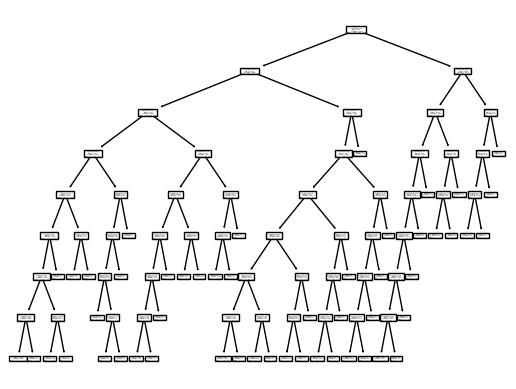

In [18]:
from sklearn import tree

clf_count_vec = tree.DecisionTreeClassifier(max_depth=8, random_state=42)
clf_count_vec = clf_count_vec.fit(X_train_count_vec, y_train)

tree.plot_tree(clf_count_vec)

In [19]:
y_hat = clf_count_vec.predict(X_test_count_vec)

In [20]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

    Negativo       0.89      0.79      0.84       297
      Neutro       0.90      0.84      0.87       595
    Positivo       0.89      0.97      0.93       837

    accuracy                           0.90      1729
   macro avg       0.90      0.87      0.88      1729
weighted avg       0.90      0.90      0.89      1729



[Text(0.6772540983606558, 0.9444444444444444, 'X[1882] <= 0.027\ngini = 0.61\nsamples = 4033\nvalue = [655, 1369, 2009]'),
 Text(0.444672131147541, 0.8333333333333334, 'X[2361] <= 0.042\ngini = 0.503\nsamples = 2895\nvalue = [527, 448, 1920]'),
 Text(0.27049180327868855, 0.7222222222222222, 'X[2357] <= 0.05\ngini = 0.344\nsamples = 2262\nvalue = [139, 326, 1797]'),
 Text(0.1721311475409836, 0.6111111111111112, 'X[1416] <= 0.103\ngini = 0.168\nsamples = 1949\nvalue = [72, 104, 1773]'),
 Text(0.11475409836065574, 0.5, 'X[2446] <= 0.09\ngini = 0.143\nsamples = 1919\nvalue = [45, 101, 1773]'),
 Text(0.08196721311475409, 0.3888888888888889, 'X[3334] <= 0.42\ngini = 0.128\nsamples = 1902\nvalue = [29, 100, 1773]'),
 Text(0.06557377049180328, 0.2777777777777778, 'X[609] <= 0.123\ngini = 0.12\nsamples = 1893\nvalue = [29, 91, 1773]'),
 Text(0.03278688524590164, 0.16666666666666666, 'X[2445] <= 0.111\ngini = 0.108\nsamples = 1870\nvalue = [29, 77, 1764]'),
 Text(0.01639344262295082, 0.055555555

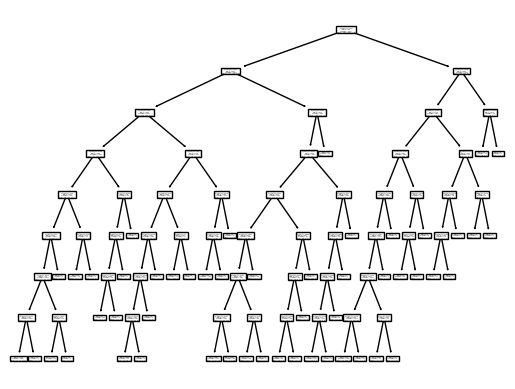

In [21]:
# resposta - TFIDFVectorizer

clf_tf_id_vec = tree.DecisionTreeClassifier(max_depth=8, random_state=42)
clf_tf_id_vec = clf_tf_id_vec.fit(X_train_id_vec, y_train)

tree.plot_tree(clf_tf_id_vec)

In [22]:
y_hat_2 = clf_tf_id_vec.predict(X_test_id_vec)

In [23]:
print(classification_report(y_test, y_hat_2))

              precision    recall  f1-score   support

    Negativo       0.87      0.79      0.83       297
      Neutro       0.86      0.86      0.86       595
    Positivo       0.92      0.95      0.93       837

    accuracy                           0.89      1729
   macro avg       0.88      0.86      0.87      1729
weighted avg       0.89      0.89      0.89      1729



## ToDo 6
Crie uma função que lematiza as palavras da coluna texto_tratado apenas se elas forem um verbo. Depois, crie uma nova coluna chamada texto_tratado_lemma que conterá o resultado da aplicação da função na coluna texto_tratado. 

Dica: use o Corpus pt_core_news_sm como referência para determinar a classe gramatical da palavra

In [25]:
!pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 27.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.1/489.1 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 8.0 MB/s eta 0:00:00
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.4/754.4 kB 13.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.1 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 31.9 MB/s eta 0:00:0000:0100:01
  Using cached MarkupSafe-2.1.1-cp38-cp38-macosx_10_9_x86_64.whl (13 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. 

In [27]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 13.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [28]:
import spacy
nlp = spacy.load('pt_core_news_sm')
def lemmatizer_verbs(text):
    sent = []
    doc = nlp(text)
    for word in doc:
        if word.pos_ == "VERB":
            sent.append(word.lemma_)
        else:
            sent.append(word.text)
    return " ".join(sent)

In [29]:
df['texto_tratado_lemma'] = df.texto_tratado.apply(lemmatizer_verbs)

## ToDo 7

repita os ToDo 3, ToDo 4 e ToDo 5, usando como feature a coluna texto_tratado_lemma, e veja se os resultados tiveram melhora.

In [30]:
df_train, df_test = train_test_split(
    df, 
    test_size = 0.3, 
    random_state = 42
)

In [31]:
#resposta - CountVectorizer
cv2 = CountVectorizer(ngram_range=(1,1))   
cv2.fit(df_train.texto_tratado_lemma)
x_train_cv2 = cv2.transform(df_train.texto_tratado_lemma)

In [32]:
# resposta - TFIDFVectorizer
tfidf2 = TfidfVectorizer(ngram_range=(1,1))  
tfidf2.fit(df_train.texto_tratado_lemma)
x_train_tf2 = tfidf2.transform(df_train.texto_tratado_lemma)

In [36]:
y_train = df_train["sentimento"]
model = tree.DecisionTreeClassifier(max_depth=8, random_state=42)
model.fit(x_train_cv2, y_train)

x_test = cv2.transform(df_test.texto_tratado_lemma)

y_prediction = model.predict(x_test)

y_test = df_test["sentimento"]
print(classification_report(y_prediction, y_test))

              precision    recall  f1-score   support

    Negativo       0.82      0.90      0.86       271
      Neutro       0.82      0.91      0.86       536
    Positivo       0.97      0.88      0.93       922

    accuracy                           0.89      1729
   macro avg       0.87      0.90      0.88      1729
weighted avg       0.90      0.89      0.90      1729

